In [4]:
import community_detection_1.main as main
import community_detection_1.score_benchmarks as sc
import community_detection_1.realcommunities_ as rc_
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# code for plotting the fig2

In [24]:
est_mu_walktrap_mean=np.load(f"est_mu_walktrap_mean.npy")
est_mu_walktrap_std=np.load(f"est_mu_walktrap_std.npy")
est_mu_luminex_mean=np.load(f"est_mu_luminex_mean.npy")
est_mu_luminex_std=np.load(f"est_mu_luminex_std.npy")
est_mu_fastgreedy_mean=np.load(f"est_mu_fastgreedy_mean.npy")
est_mu_fastgreedy_std=np.load(f"est_mu_fastgreedy_std.npy")

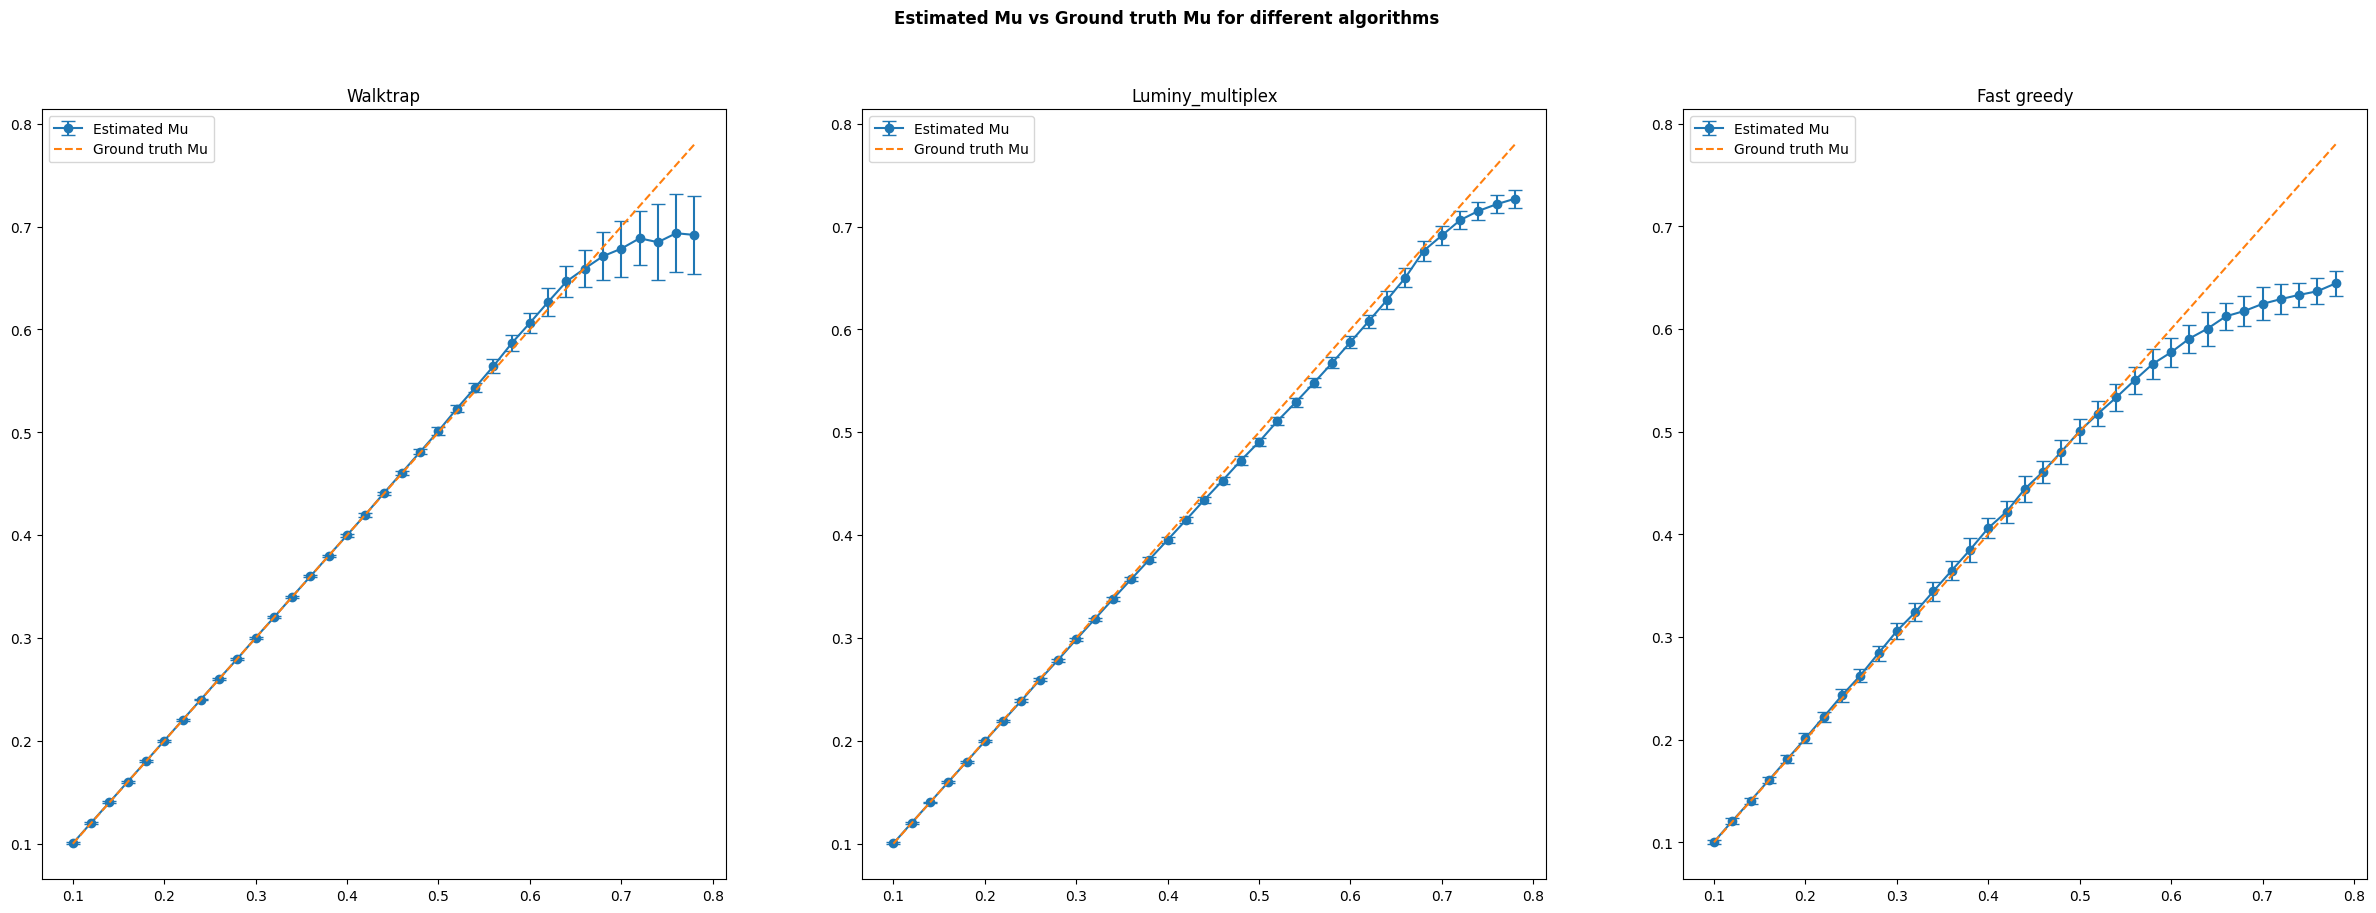

In [25]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(1,3,figsize=(30,10))
X=np.arange(0.1,0.80,0.02)
axs[0].errorbar(X, est_mu_walktrap_mean, yerr=est_mu_walktrap_std, label='Estimated Mu', fmt='-o', capsize=5)
axs[0].errorbar(X,X,label='Ground truth Mu',fmt='--')
axs[0].set_title('Walktrap')
axs[0].legend()
axs[1].errorbar(X, est_mu_luminex_mean, yerr=est_mu_luminex_std, label='Estimated Mu', fmt='-o', capsize=5)
axs[1].errorbar(X,X,label='Ground truth Mu',fmt='--')
axs[1].set_title('Luminy_multiplex')
axs[1].legend()
axs[2].errorbar(X, est_mu_fastgreedy_mean, yerr=est_mu_fastgreedy_std, label='Estimated Mu', fmt='-o', capsize=5)
axs[2].errorbar(X,X,label='Ground truth Mu',fmt='--')
axs[2].set_title('Fast greedy')
axs[2].legend()
plt.suptitle('Estimated Mu vs Ground truth Mu for different algorithms',fontweight='bold')
plt.legend()

The commented out cells below were the original codes written to run the benchmark experiment to obtain the above results

In [26]:
"""def groundtruth(community_path):
    community=open(community_path)
    nodeid=[]
    communityid=[]
    for i in community:
        l=len(i.split('\t')[1].split(' '))-1
        for j in range(l):
            nodeid.append(int(i.split('\t')[0]))
            communityid.append(int(i.split('\t')[1].split(' ')[j]))
    dict_={'nodeid':nodeid,'communityid':communityid}
    df=pd.DataFrame(dict_)
    grouped=df.groupby(df.communityid)
    realcommunities=[]
    for i in range(max(communityid)):
        df_new=grouped.get_group(i+1)
        realcommunities.append(list(df_new['nodeid']))
    return realcommunities"""

"def groundtruth(community_path):\n    community=open(community_path)\n    nodeid=[]\n    communityid=[]\n    for i in community:\n        l=len(i.split('\t')[1].split(' '))-1\n        for j in range(l):\n            nodeid.append(int(i.split('\t')[0]))\n            communityid.append(int(i.split('\t')[1].split(' ')[j]))\n    dict_={'nodeid':nodeid,'communityid':communityid}\n    df=pd.DataFrame(dict_)\n    grouped=df.groupby(df.communityid)\n    realcommunities=[]\n    for i in range(max(communityid)):\n        df_new=grouped.get_group(i+1)\n        realcommunities.append(list(df_new['nodeid']))\n    return realcommunities"

In [27]:
"""gt=rc_('network.dat')
print(sc.nmi_score(gt, res))"""

"gt=rc_('network.dat')\nprint(sc.nmi_score(gt, res))"

In [28]:
"""import networkx as nx

def calculate_mixing_parameter(G, communities):
    # Create a dictionary to map each node to its community
    node_to_community = {}
    for i, community in enumerate(communities):
        for node in community:
            node_to_community[node] = i

    total_k_ext = 0
    total_k_tot = 0
    
    # For each node in the graph
    for node in G.nodes():
        k_tot = G.degree[node]  # Total degree of node i
        k_ext = 0  # External degree (edges to nodes outside the community)
        
        # Check neighbors of the node
        for neighbor in G.neighbors(node):
            if node_to_community[neighbor] != node_to_community[node]:
                k_ext += 1
        
        # Sum up the external and total degrees
        total_k_ext += k_ext
        total_k_tot += k_tot

    # Calculate the average mixing parameter (mu)
    mu = total_k_ext / total_k_tot if total_k_tot > 0 else 0
    return mu
"""



'import networkx as nx\n\ndef calculate_mixing_parameter(G, communities):\n    # Create a dictionary to map each node to its community\n    node_to_community = {}\n    for i, community in enumerate(communities):\n        for node in community:\n            node_to_community[node] = i\n\n    total_k_ext = 0\n    total_k_tot = 0\n    \n    # For each node in the graph\n    for node in G.nodes():\n        k_tot = G.degree[node]  # Total degree of node i\n        k_ext = 0  # External degree (edges to nodes outside the community)\n        \n        # Check neighbors of the node\n        for neighbor in G.neighbors(node):\n            if node_to_community[neighbor] != node_to_community[node]:\n                k_ext += 1\n        \n        # Sum up the external and total degrees\n        total_k_ext += k_ext\n        total_k_tot += k_tot\n\n    # Calculate the average mixing parameter (mu)\n    mu = total_k_ext / total_k_tot if total_k_tot > 0 else 0\n    return mu\n'

In [29]:
"""def process_network_file(network_file,weighted=True,directed=False):
    if weighted:
        if directed:
            G=nx.read_edgelist(network_file, data=(('weight', float),), nodetype=int,create_using=nx.DiGraph())
        else:
            G=nx.read_edgelist(network_file, data=(('weight', float),), nodetype=int)
    else:
        if directed:
            G=nx.read_edgelist(network_file, nodetype=int,create_using=nx.DiGraph())
        else:
            G=nx.read_edgelist(network_file, nodetype=int)
    #print(G.nodes)
    return G"""

"def process_network_file(network_file,weighted=True,directed=False):\n    if weighted:\n        if directed:\n            G=nx.read_edgelist(network_file, data=(('weight', float),), nodetype=int,create_using=nx.DiGraph())\n        else:\n            G=nx.read_edgelist(network_file, data=(('weight', float),), nodetype=int)\n    else:\n        if directed:\n            G=nx.read_edgelist(network_file, nodetype=int,create_using=nx.DiGraph())\n        else:\n            G=nx.read_edgelist(network_file, nodetype=int)\n    #print(G.nodes)\n    return G"

In [30]:
"""G=process_network_file("D:/Data/D Drive/networksProject/Mu-0.10/R_1/network.dat")
communities=groundtruth("D:/Data/D Drive/networksProject/Mu-0.10/R_1/community.dat")
print(len(communities))
mu=calculate_mixing_parameter(G,communities)"""

'G=process_network_file("D:/Data/D Drive/networksProject/Mu-0.10/R_1/network.dat")\ncommunities=groundtruth("D:/Data/D Drive/networksProject/Mu-0.10/R_1/community.dat")\nprint(len(communities))\nmu=calculate_mixing_parameter(G,communities)'

In [31]:
"""root_folder="D:/Data/D Drive/networksProject/"
mu=np.arange(0.1,0.82,0.02)"""

'root_folder="D:/Data/D Drive/networksProject/"\nmu=np.arange(0.1,0.82,0.02)'

In [32]:
"""mu=np.round(mu,2)
mu = [f"{x:.2f}" for x in mu]
"""

'mu=np.round(mu,2)\nmu = [f"{x:.2f}" for x in mu]\n'

In [33]:
"""est_mu_walktrap_mean=[]
est_mu_walktrap_std=[]"""

'est_mu_walktrap_mean=[]\nest_mu_walktrap_std=[]'

In [34]:
#input_file

In [35]:
"""com,t= main.run_community_detection(input_file,'walktrap',steps=20)
len(com)"""

"com,t= main.run_community_detection(input_file,'walktrap',steps=20)\nlen(com)"

In [36]:
"""for i in range(35):
    curr_folder=f"{root_folder}Mu-{mu[i]}/"
    print(curr_folder)
    est_mu=[]
    for j in range(100):
        
        curr_sub_folder=f"{curr_folder}R_{j+1}/"
        print(curr_sub_folder)
        input_file=f"{curr_sub_folder}network.dat"
        com,_= main.run_community_detection(input_file,'walktrap')
        G=process_network_file(input_file)
        mu_est=calculate_mixing_parameter(G,com)
        est_mu.append(mu_est)
    est_mu_walktrap_mean.append(np.mean(est_mu))
    est_mu_walktrap_std.append(np.std(est_mu))   """     



'for i in range(35):\n    curr_folder=f"{root_folder}Mu-{mu[i]}/"\n    print(curr_folder)\n    est_mu=[]\n    for j in range(100):\n        \n        curr_sub_folder=f"{curr_folder}R_{j+1}/"\n        print(curr_sub_folder)\n        input_file=f"{curr_sub_folder}network.dat"\n        com,_= main.run_community_detection(input_file,\'walktrap\')\n        G=process_network_file(input_file)\n        mu_est=calculate_mixing_parameter(G,com)\n        est_mu.append(mu_est)\n    est_mu_walktrap_mean.append(np.mean(est_mu))\n    est_mu_walktrap_std.append(np.std(est_mu))   '

In [37]:
"""est_mu_louvain_mean=[]
est_mu_louvain_std=[]

for i in range(35):
    curr_folder=f"{root_folder}Mu-{mu[i]}/"
    print(curr_folder)
    est_mu=[]
    for j in range(100):
        
        curr_sub_folder=f"{curr_folder}R_{j+1}/"
        print(curr_sub_folder)
        input_file=f"{curr_sub_folder}network.dat"
        com,_= main.run_community_detection(input_file,'louvain')
        G=process_network_file(input_file)
        mu_est=calculate_mixing_parameter(G,com)
        est_mu.append(mu_est)
    est_mu_louvain_mean.append(np.mean(est_mu))
    est_mu_louvain_std.append(np.std(est_mu))   """     



'est_mu_louvain_mean=[]\nest_mu_louvain_std=[]\n\nfor i in range(35):\n    curr_folder=f"{root_folder}Mu-{mu[i]}/"\n    print(curr_folder)\n    est_mu=[]\n    for j in range(100):\n        \n        curr_sub_folder=f"{curr_folder}R_{j+1}/"\n        print(curr_sub_folder)\n        input_file=f"{curr_sub_folder}network.dat"\n        com,_= main.run_community_detection(input_file,\'louvain\')\n        G=process_network_file(input_file)\n        mu_est=calculate_mixing_parameter(G,com)\n        est_mu.append(mu_est)\n    est_mu_louvain_mean.append(np.mean(est_mu))\n    est_mu_louvain_std.append(np.std(est_mu))   '

In [38]:
"""est_mu_luminex_mean=[]
est_mu_luminex_std=[]

for i in range(35):
    curr_folder=f"{root_folder}Mu-{mu[i]}/"
    print(curr_folder)
    est_mu=[]
    for j in range(100):
        
        curr_sub_folder=f"{curr_folder}R_{j+1}/"
        print(curr_sub_folder)
        input_file=f"{curr_sub_folder}network.dat"
        com,_= main.run_community_detection(input_file,'luminex')
        G=process_network_file(input_file)
        mu_est=calculate_mixing_parameter(G,com)
        est_mu.append(mu_est)
    est_mu_luminex_mean.append(np.mean(est_mu))
    est_mu_luminex_std.append(np.std(est_mu))        
"""


'est_mu_luminex_mean=[]\nest_mu_luminex_std=[]\n\nfor i in range(35):\n    curr_folder=f"{root_folder}Mu-{mu[i]}/"\n    print(curr_folder)\n    est_mu=[]\n    for j in range(100):\n        \n        curr_sub_folder=f"{curr_folder}R_{j+1}/"\n        print(curr_sub_folder)\n        input_file=f"{curr_sub_folder}network.dat"\n        com,_= main.run_community_detection(input_file,\'luminex\')\n        G=process_network_file(input_file)\n        mu_est=calculate_mixing_parameter(G,com)\n        est_mu.append(mu_est)\n    est_mu_luminex_mean.append(np.mean(est_mu))\n    est_mu_luminex_std.append(np.std(est_mu))        \n'

In [39]:
"""est_mu_fastgreedy_mean=[]
est_mu_fastgreedy_std=[]

for i in range(35):
    curr_folder=f"{root_folder}Mu-{mu[i]}/"
    print(curr_folder)
    est_mu=[]
    for j in range(100):
        
        curr_sub_folder=f"{curr_folder}R_{j+1}/"
        print(curr_sub_folder)
        input_file=f"{curr_sub_folder}network.dat"
        com,_= main.run_community_detection(input_file,'fast_greedy')
        G=process_network_file(input_file)
        mu_est=calculate_mixing_parameter(G,com)
        est_mu.append(mu_est)
    est_mu_fastgreedy_mean.append(np.mean(est_mu))
    est_mu_fastgreedy_std.append(np.std(est_mu))   """     



'est_mu_fastgreedy_mean=[]\nest_mu_fastgreedy_std=[]\n\nfor i in range(35):\n    curr_folder=f"{root_folder}Mu-{mu[i]}/"\n    print(curr_folder)\n    est_mu=[]\n    for j in range(100):\n        \n        curr_sub_folder=f"{curr_folder}R_{j+1}/"\n        print(curr_sub_folder)\n        input_file=f"{curr_sub_folder}network.dat"\n        com,_= main.run_community_detection(input_file,\'fast_greedy\')\n        G=process_network_file(input_file)\n        mu_est=calculate_mixing_parameter(G,com)\n        est_mu.append(mu_est)\n    est_mu_fastgreedy_mean.append(np.mean(est_mu))\n    est_mu_fastgreedy_std.append(np.std(est_mu))   '

In [40]:
len(X)

35

In [41]:
"""np.save(f"{root_folder}est_mu_walktrap_mean.npy",est_mu_walktrap_mean)
np.save(f"{root_folder}est_mu_walktrap_std.npy",est_mu_walktrap_std)
np.save(f"{root_folder}est_mu_luminex_mean.npy",est_mu_luminex_mean)
np.save(f"{root_folder}est_mu_luminex_std.npy",est_mu_luminex_std)
np.save(f"{root_folder}est_mu_fastgreedy_mean.npy",est_mu_fastgreedy_mean)
np.save(f"{root_folder}est_mu_fastgreedy_std.npy",est_mu_fastgreedy_std)"""

'np.save(f"{root_folder}est_mu_walktrap_mean.npy",est_mu_walktrap_mean)\nnp.save(f"{root_folder}est_mu_walktrap_std.npy",est_mu_walktrap_std)\nnp.save(f"{root_folder}est_mu_luminex_mean.npy",est_mu_luminex_mean)\nnp.save(f"{root_folder}est_mu_luminex_std.npy",est_mu_luminex_std)\nnp.save(f"{root_folder}est_mu_fastgreedy_mean.npy",est_mu_fastgreedy_mean)\nnp.save(f"{root_folder}est_mu_fastgreedy_std.npy",est_mu_fastgreedy_std)'

In [42]:
"""res= main.run_community_detection('network.dat','exp-laplacian_kernel')

gt=rc_('network.dat')
print(sc.nmi_score(gt, res))"""

"res= main.run_community_detection('network.dat','exp-laplacian_kernel')\n\ngt=rc_('network.dat')\nprint(sc.nmi_score(gt, res))"